# Introduction to `nelpy` EpochArrays

# EpochArray

## Overview

In `nelpy`, all core data objects (`EpochArray`, `AnalogSignalArray`, `SpiketrainArray`, `BinnedSpiketrainArray`, etc.) have an associated and underlying `EpochArray`, including `EpochArray` itself.

## What is an Epoch?

An **Epoch** is simply a time interval. More specifically, epochs in `nelpy` are half-open intervals `I=[a, b)` measured in seconds. The `EpochArray` object defines a collection of epochs, along with common operations and transformations that can be performed on them.

## What are EpochArrays used for?

`EpochArray`s are fundamental to nelpy because they define **when data is defined**.

### Example: Firing Rate Calculation

Consider recording action potentials (spikes) from a single neuron with spike times:

```
spike_times = 1, 3, 4, 5, 9, 18 (seconds)
```

To compute even the simplest estimates like average firing rate, we need to know: _how long did we record for?_

- If we observed these spike times over **1 minute**: 
  - Firing rate = 6 spikes / 60 seconds = **0.1 Hz**
- If we observed the neuron only for `I=[0,20)`:
  - Firing rate = 6 spikes / 20 seconds = **0.3 Hz**

!!! info "Key Insight"
    `EpochArrays` define **when the observed data is valid**, making rate calculations and other analyses meaningful.

### Example: Data Subset Extraction

`EpochArrays` make it easy to extract subsets of data for further analysis.

**Scenario:**
- LFP (local field potential) data on `I_LFP=[0,60)`
- Animal run speed estimates on `I_speed = [3,27)`
- Goal: Calculate average LFP _only during periods when the animal was running faster than some threshold_

**Solution:**
1. Determine epochs within `I_speed` that satisfy the speed criteria
2. Store these epochs in a single `EpochArray`
3. Directly index LFP with this new `EpochArray` to get the restricted subset

!!! note "Disclaimer"
    This example requires additional objects to be fully implemented, but conceptually this type of operation is very common and is made almost trivial with `EpochArrays`.

## Support vs Domain

### Support
While technically a mathematical "support" of a function refers to the region on its domain where the function is non-zero, we use the term more loosely here:

!!! info "Nelpy Support Definition"
    A `nelpy` object's **support** is the region where the object (data) is defined.

### Domain
The **domain** specifies where the object (data) _could be defined_.

- **Default domain:** All objects have a domain of `Ω = (-∞, ∞)`
- **Purpose:** The domain is necessary when talking about complements
- **Example:** In the default domain, the complement of `[a, b)` is `(-∞, a) ∪ [b, ∞)`

### Key Distinction

| Concept | Definition | Example |
|---------|------------|---------|
| **Support** | Where data _is_ defined | `[0, 10) ∪ [20, 30)` |
| **Domain** | Where data _could be_ defined | `(-∞, ∞)` |
| **Complement** | Domain minus support | `(-∞, 0) ∪ [10, 20) ∪ [30, ∞)` |

## Set-Theoretic Operations

Recall that the default domain for any `nelpy` object is $\Omega = (-\infty, \infty)$. Several set-theoretic operations are available in `nelpy`:

### Set Difference
$A - B := \{x \in \Omega : x\in A, x \notin B\}$

```python
# nelpy syntax
result = A - B
```

### Set Intersection
$A \cap B := \{x \in \Omega : x\in A, x\in B\}$

```python
# nelpy syntax (two equivalent forms)
result = A & B
result = A[B]
```

### Set Union
$A \cup B := \{x \in \Omega : x\in A \text{ or } x\in B\}$

```python
# nelpy syntax
result = A | B
```

### Set Complement
$A^{\text{c}} := \{x \in \Omega : x \notin A\}$

```python
# nelpy syntax
result = ~A
```

### Set Merger
$\text{merge}(A) := \{x \in \Omega : x \in A\}$

```python
# nelpy syntax
result = A.merge()
```

### Set Addition
$A + B := \{\omega : \omega \in A \text{ or } \omega \in B \}$

```python
# nelpy syntax
result = A + B
```


In the above definitions:

$\{x\}$ are **samples** (individual time points)
$\{\omega \}$ are **epochs** (time intervals)

### Importing nelpy

In [1]:
import nelpy as nel

### Interacting with EpochArrays

Frequently, `EpochArrays` will underlie other `nelpy` objects, and you won't need to worry about interacting with them too much. However, there are cases where direct manipulation and / or interaction can be very useful.

First of all, all `nelpy` objects have human-readable `__repr__` methods that make it convenient to get a quick summary (and insight) of the data object. Let's take a closer look.

We start by creating an `EpochArray` containing three disjoint intervals, namely `[0, 3) ∪ [5, 6) ∪ [10, 15)`:



In [2]:
ep = nel.EpochArray([[0, 3], [5, 6], [10, 15]])

which we can look at either by calling `print()` on the `EpochArray` object, or by evaluating `ep` in the REPL.

In [3]:
print(ep)

<EpochArray at 0x1be4dae8a10: 3 epochs> of length 9 seconds


Here we can see that we received immediate feedback, namely that there are 3 epochs inside the `EpochArray`, and that the total duration of those epochs is 9 seconds.

Nelpy makes it easy to read durations of various magnitudes, and would print "1:20 minutes" for a duration of 80 seconds, and "2:13:20 hours" for a duration of 8000 seconds, for example.

#TODO: add examples of operators, union, intersection, iteration, slicing, indexing, class attributes, plotting, ...

### Now we add interactive widgets to explore transformations of EpochArrays

In [4]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import fixed, interact

import nelpy.plotting as npl

%matplotlib inline

warnings.filterwarnings("ignore")

In [5]:
times = np.array(
    [
        [1.0, 3.0],
        [4.0, 8.0],
        [12.0, 13.0],
        [20.0, 25.0],
        [1.0, 5.0],
        [6.0, 7.0],
        [15.0, 18.0],
        [30.0, 35.0],
    ]
)
ep1 = nel.EpochArray(times, domain=nel.EpochArray([0, 50]))

In [6]:
(ep1 - ep).time

array([[ 3.,  5.],
       [ 4.,  5.],
       [ 6.,  8.],
       [ 6.,  7.],
       [15., 18.],
       [20., 25.],
       [30., 35.]])

In [7]:
(ep1 + 5).domain

<EpochArray at 0x1be4f66cdd0: 1 epoch> of length 50 seconds

In [8]:
def epplt(epoch, expand=0, rshift=0, lshift=0, merge=False, complement=False):
    fig = plt.figure(figsize=(16, 1))
    ax = fig.add_subplot(111)

    epoch = epoch + expand
    epoch = epoch >> rshift
    epoch = epoch << lshift
    if merge:
        epoch = epoch.merge()
    if complement:
        epoch = ~epoch
    ax = npl.epochplot(epoch)
    ax.set_xlim(epoch.domain.start, epoch.domain.stop)
    npl.utils.clear_left_right(ax)
    npl.utils.clear_top(ax)

interactive(children=(FloatSlider(value=0.0, description='expand', max=2.5, min=-0.5), FloatSlider(value=0.0, …

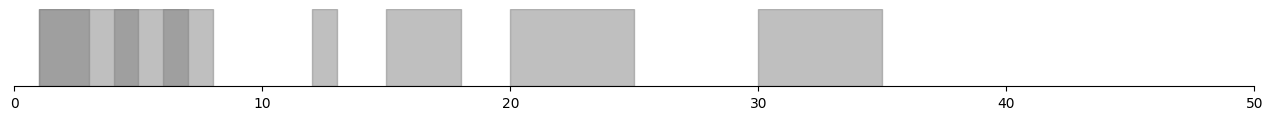

In [9]:
interact(
    epplt,
    epoch=fixed(ep1),
    expand=(-0.5, 2.5, 0.1),
    rshift=(0, 12.5, 0.5),
    lshift=(0, 12, 0.5),
    merge=False,
    complement=False,
);

In [10]:
ep1.time

array([[ 1.,  3.],
       [ 1.,  5.],
       [ 4.,  8.],
       [ 6.,  7.],
       [12., 13.],
       [15., 18.],
       [20., 25.],
       [30., 35.]])

In [11]:
(ep1 + 2).time

array([[-1.,  5.],
       [-1.,  7.],
       [ 2., 10.],
       [ 4.,  9.],
       [10., 15.],
       [13., 20.],
       [18., 27.],
       [28., 37.]])

Recall that the default domain for any `nelpy` object is $\Omega = (-\infty, \infty)$. Several set-theoretic operations are available in `nelpy`, namely:
 * Set difference: $$A - B := \{x \in \Omega : x\in A, x \notin B\}$$ `nelpy: A - B`
 * Set intersection $$A \cap B := \{x \in \Omega : x\in A, x\in B\}$$ `nelpy: A & B` or `A[B]`
 * Set union $$A \cup B := \{x \in \Omega : x\in A \text{ or } x\in B\}$$ `nelpy: A | B`
 * Set complement $$A^{\text{c}} := \{x \in \Omega : x \notin A\}$$ `nelpy: ~A`
 * Set merger $$\text{merge}(A) := \{x \in \Omega : x \in A\}$$ `nelpy: A.merge()`
 * Set addition $$A + B := \{\omega : \omega \in A \text{ or } \omega \in B \}$$ `nelpy: A + B`

where $\{x\}$ are samples, and $\{\omega\}$ are epochs.